Let's load the libraries we will need first

In [1]:
library("ggplot2")
library("knitr")
library("devtools")

Now, data, we need to load it up

In [2]:
tabela <- read.csv( file="/home/mapastec/Downloads/jupyter-notebooks/GLB.Ts.csv", sep="," )

Using head we can show first few rows of our newly created dataframe. Looks like we have some data for each of the month separatelly and then some sort of season data too.

In [3]:
head(tabela)

Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J.D,D.N,DJF,MAM,JJA,SON
1881,-0.81,-0.66,-0.40,-0.31,-0.08,-1.17,-0.60,-0.31,-0.40,-0.53,-0.61,-0.19,-0.51,-0.54,-0.68,-0.26,-0.69,-0.51
1882,0.04,-0.19,-0.16,-0.65,-0.44,-1.09,-0.77,-0.17,-0.15,-0.38,-0.46,-0.73,-0.43,-0.38,-0.11,-0.42,-0.68,-0.33
1883,-0.73,-1.01,-0.51,-0.37,-0.40,0.40,-0.06,-0.21,-0.51,-0.62,-0.74,-0.44,-0.43,-0.46,-0.82,-0.43,0.04,-0.62
1884,-0.65,-0.40,-0.45,-0.99,-1.25,-0.87,-0.90,0.10,-0.41,-0.83,-0.87,-1.04,-0.71,-0.66,-0.50,-0.89,-0.56,-0.70
1885,-0.97,-0.84,-0.96,-0.91,-0.54,-0.98,-0.67,-0.21,-0.20,-0.08,-0.43,-0.03,-0.57,-0.65,-0.95,-0.81,-0.62,-0.24
1886,-0.80,-0.88,-0.73,-0.66,-0.61,-0.88,-0.44,-0.78,-0.46,-0.91,-0.54,-0.80,-0.71,-0.64,-0.57,-0.66,-0.70,-0.64


First we would like to show data for each month separatelly, not for seasons. Looks like we can remove 5 last columns (average deviation December-November, January-December, 4 columns of seasons)

In [4]:
tabela <- subset(tabela, select=(1:13))
head(tabela)

Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1881,-0.81,-0.66,-0.40,-0.31,-0.08,-1.17,-0.60,-0.31,-0.40,-0.53,-0.61,-0.19
1882,0.04,-0.19,-0.16,-0.65,-0.44,-1.09,-0.77,-0.17,-0.15,-0.38,-0.46,-0.73
1883,-0.73,-1.01,-0.51,-0.37,-0.40,0.40,-0.06,-0.21,-0.51,-0.62,-0.74,-0.44
1884,-0.65,-0.40,-0.45,-0.99,-1.25,-0.87,-0.90,0.10,-0.41,-0.83,-0.87,-1.04
1885,-0.97,-0.84,-0.96,-0.91,-0.54,-0.98,-0.67,-0.21,-0.20,-0.08,-0.43,-0.03
1886,-0.80,-0.88,-0.73,-0.66,-0.61,-0.88,-0.44,-0.78,-0.46,-0.91,-0.54,-0.80


Let's have a look at the dataframe description

In [5]:
str(tabela)

'data.frame':	135 obs. of  13 variables:
 $ Year: int  1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 ...
 $ Jan : num  -0.81 0.04 -0.73 -0.65 -0.97 -0.8 -0.89 -0.76 -0.33 -0.65 ...
 $ Feb : num  -0.66 -0.19 -1.01 -0.4 -0.84 -0.88 -1.29 -0.85 0.12 -0.68 ...
 $ Mar : num  -0.4 -0.16 -0.51 -0.45 -0.96 -0.73 -0.61 -0.93 0.03 -0.66 ...
 $ Apr : num  -0.31 -0.65 -0.37 -0.99 -0.91 -0.66 -0.86 -0.34 0.08 -0.56 ...
 $ May : num  -0.08 -0.44 -0.4 -1.25 -0.54 -0.61 -0.88 -0.78 0.06 -0.96 ...
 $ Jun : num  -1.17 -1.09 0.4 -0.87 -0.98 -0.88 -0.69 -0.59 -0.35 -0.61 ...
 $ Jul : num  -0.6 -0.77 -0.06 -0.9 -0.67 -0.44 -0.43 -0.39 -0.45 -0.64 ...
 $ Aug : num  -0.31 -0.17 -0.21 0.1 -0.21 -0.78 -0.29 -0.38 -0.65 -0.65 ...
 $ Sep : num  -0.4 -0.15 -0.51 -0.41 -0.2 -0.46 -0.65 -0.44 -0.41 -0.38 ...
 $ Oct : num  -0.53 -0.38 -0.62 -0.83 -0.08 -0.91 -0.56 -0.3 -0.25 -0.3 ...
 $ Nov : num  -0.61 -0.46 -0.74 -0.87 -0.43 -0.54 -0.94 -0.09 -0.48 -0.8 ...
 $ Dec : num  -0.19 -0.73 -0.44 -1.04 -0.03 -0.8 -0.6

We need to reformat the data so that we can use it later in visualisations

In [6]:
tabela.reshaped <- reshape(tabela,idvar = "Year",
					varying = list( c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")),
					v.names = "Deviation",times = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"),
					timevar="Month", direction = "long")

str(tabela.reshaped)

head(tabela.reshaped)

'data.frame':	1620 obs. of  3 variables:
 $ Year     : int  1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 ...
 $ Month    : chr  "Jan" "Jan" "Jan" "Jan" ...
 $ Deviation: num  -0.81 0.04 -0.73 -0.65 -0.97 -0.8 -0.89 -0.76 -0.33 -0.65 ...
 - attr(*, "reshapeLong")=List of 4
  ..$ varying:List of 1
  .. ..$ : chr  "Jan" "Feb" "Mar" "Apr" ...
  ..$ v.names: chr "Deviation"
  ..$ idvar  : chr "Year"
  ..$ timevar: chr "Month"


,Year,Month,Deviation
1881.Jan,1881,Jan,-0.81
1882.Jan,1882,Jan,0.04
1883.Jan,1883,Jan,-0.73
1884.Jan,1884,Jan,-0.65
1885.Jan,1885,Jan,-0.97
1886.Jan,1886,Jan,-0.80


It may be good idea to change months to factor type and set the levels. What is factor?

In [7]:
?factor

In [8]:
tabela.reshaped$Month <- factor(tabela.reshaped$Month, levels = c("Jan", "Feb", "Mar", 
                                                                  "Apr", "May", "Jun", 
                                                                  "Jul", "Aug", "Sep", 
                                                                  "Oct", "Nov", "Dec"))

str(tabela.reshaped)

'data.frame':	1620 obs. of  3 variables:
 $ Year     : int  1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 ...
 $ Month    : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Deviation: num  -0.81 0.04 -0.73 -0.65 -0.97 -0.8 -0.89 -0.76 -0.33 -0.65 ...
 - attr(*, "reshapeLong")=List of 4
  ..$ varying:List of 1
  .. ..$ : chr  "Jan" "Feb" "Mar" "Apr" ...
  ..$ v.names: chr "Deviation"
  ..$ idvar  : chr "Year"
  ..$ timevar: chr "Month"


Now we want to show something for single year

In [9]:
tabela.reshaped.2010 <- tabela.reshaped[tabela.reshaped$Year==2010,]
tabela.reshaped.2010

,Year,Month,Deviation
2010.Jan,2010,Jan,0.96
2010.Feb,2010,Feb,1.04
2010.Mar,2010,Mar,1.12
2010.Apr,2010,Apr,1.00
2010.May,2010,May,0.95
2010.Jun,2010,Jun,0.85
2010.Jul,2010,Jul,0.73
2010.Aug,2010,Aug,0.82
2010.Sep,2010,Sep,0.85
2010.Oct,2010,Oct,0.95


Let's create it for each year

In [10]:
for(i in 1990:1999){ 
    nam <- paste("tabela.reshaped.", i, sep = "")
    assign(nam, tabela.reshaped[tabela.reshaped$Year==i,])
}

First chart, we will use gpplot. This is one of the main library for plotting in R

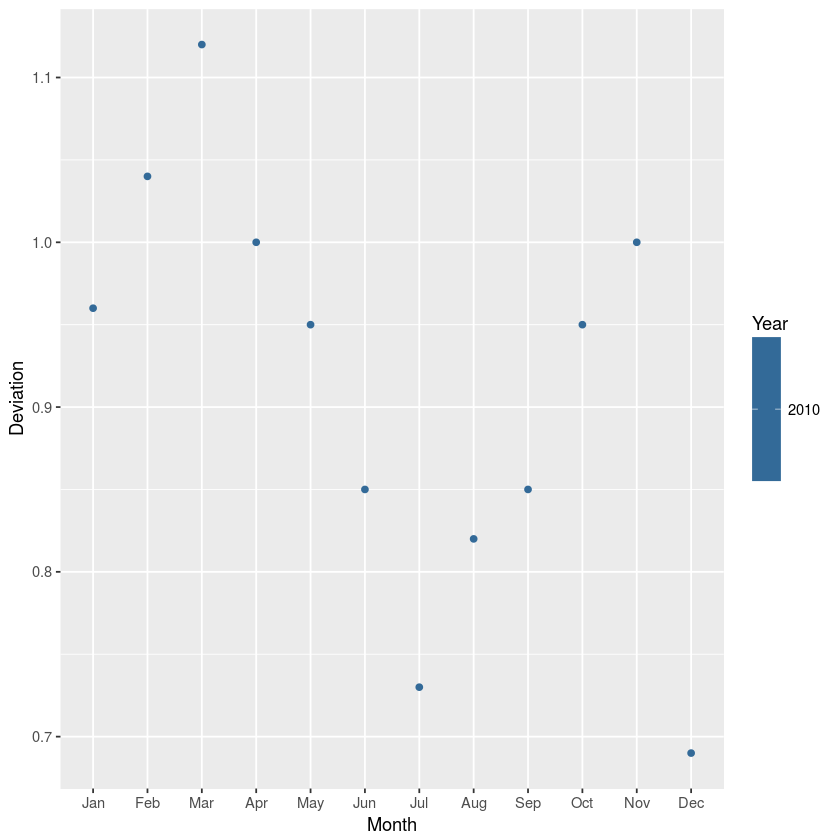

In [11]:
wykres <- ggplot(data=tabela.reshaped.2010, aes(x=Month, y=Deviation, colour=Year)) + geom_point()
wykres

Well ... it shows something, but we're not quite there yet, are we? Let's at least connect the dots. Maybe a title would do too.

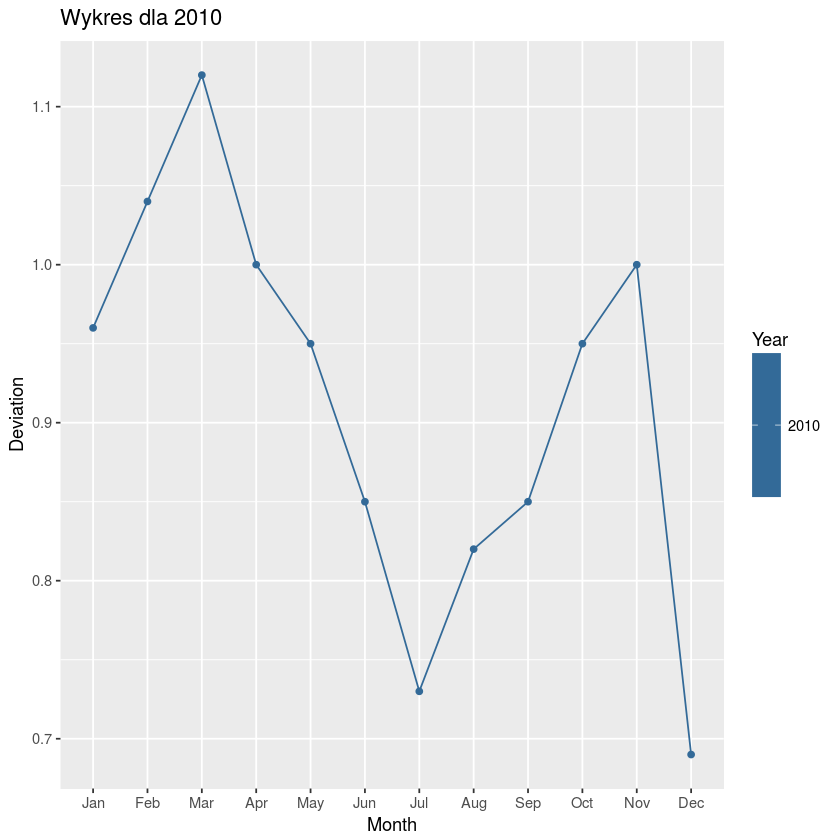

In [12]:
wykres <- ggplot(data=tabela.reshaped.2010, aes(x=Month, y=Deviation, colour=Year)) + geom_point() + geom_line(aes(group=Year))+ ggtitle("Wykres dla 2010")
wykres

Does it show anytning useful? It shows that year 2010 was warmer than the average, that could be useful piece of data. What if we would like to show all years on one single plot?

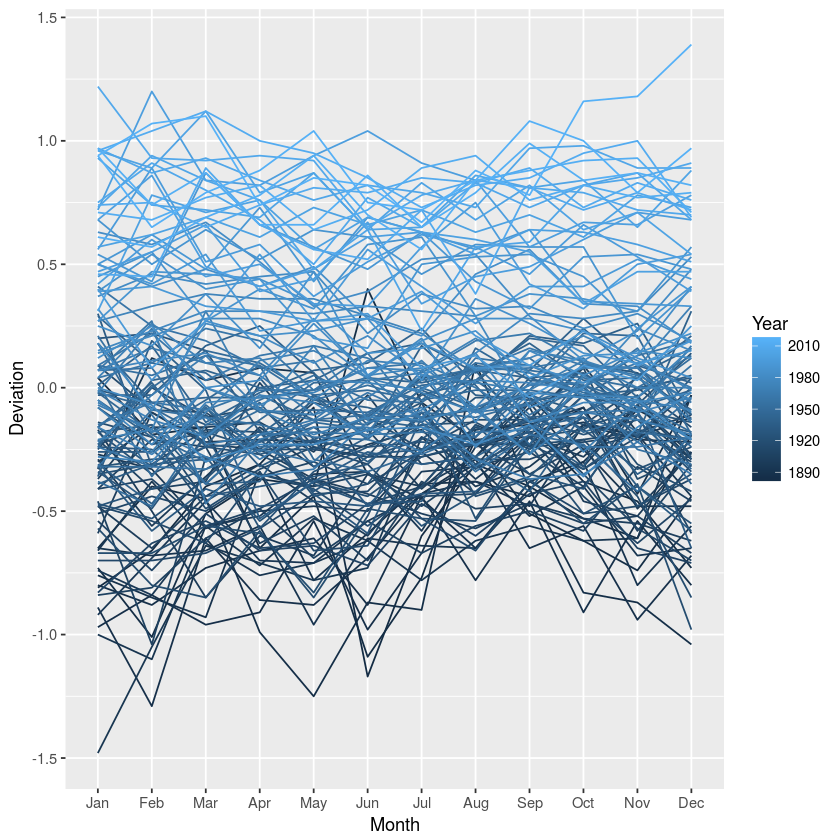

In [13]:
wykres.years <- ggplot( data=tabela.reshaped, aes( x=Month, y=Deviation, group=Year, colour=Year ) )
wykres.years + geom_line()

It looks cool, if you focus enough on it you can even spot a trend. People tend to get more from visualisation if it is served in a way they don't really need to focus too much though. One way to do it with chart like this is to use animation and plot the lines one by one starting with the oldest to the newest.

For that we will use gganimate library which is not yet officially available in CRAN or Anaconda. Let's compile its dev version and then load it up.

In [15]:
#devtools::install_github("dgrtwo/gganimate")
library(gganimate)
library(cowplot)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [ ]:
#install.packages("cowplot")

In [16]:
wykres.years.an <- ggplot( data=tabela.reshaped, aes( x=Month, y=Deviation, group=Year, colour=Year, frame=Year ) )

gganimate(wykres.years.an + geom_line(), "output.gif")

Executing: 
'convert' -loop 0 -dispose none -delay 0 plot1.png -dispose previous
    -delay 100 plot2.png plot3.png plot4.png plot5.png plot6.png
    plot7.png plot8.png plot9.png plot10.png plot11.png plot12.png
    plot13.png plot14.png plot15.png plot16.png plot17.png plot18.png
    plot19.png plot20.png plot21.png plot22.png plot23.png plot24.png
    plot25.png plot26.png plot27.png plot28.png plot29.png plot30.png
    plot31.png plot32.png plot33.png plot34.png plot35.png plot36.png
    plot37.png plot38.png plot39.png plot40.png plot41.png plot42.png
    plot43.png plot44.png plot45.png plot46.png plot47.png plot48.png
    plot49.png plot50.png plot51.png plot52.png plot53.png plot54.png
    plot55.png plot56.png plot57.png plot58.png plot59.png plot60.png
    plot61.png plot62.png plot63.png plot64.png plot65.png plot66.png
    plot67.png plot68.png plot69.png plot70.png plot71.png plot72.png
    plot73.png plot74.png plot75.png plot76.png plot77.png plot78.png
    plot79.png pl

In [17]:
gganimate(wykres.years.an + geom_line(cumulative = TRUE))

Warning message:
“Ignoring unknown parameters: cumulative”Executing: 
'convert' -loop 0 -dispose none -delay 0 plot1.png -dispose previous
    -delay 100 plot2.png plot3.png plot4.png plot5.png plot6.png
    plot7.png plot8.png plot9.png plot10.png plot11.png plot12.png
    plot13.png plot14.png plot15.png plot16.png plot17.png plot18.png
    plot19.png plot20.png plot21.png plot22.png plot23.png plot24.png
    plot25.png plot26.png plot27.png plot28.png plot29.png plot30.png
    plot31.png plot32.png plot33.png plot34.png plot35.png plot36.png
    plot37.png plot38.png plot39.png plot40.png plot41.png plot42.png
    plot43.png plot44.png plot45.png plot46.png plot47.png plot48.png
    plot49.png plot50.png plot51.png plot52.png plot53.png plot54.png
    plot55.png plot56.png plot57.png plot58.png plot59.png plot60.png
    plot61.png plot62.png plot63.png plot64.png plot65.png plot66.png
    plot67.png plot68.png plot69.png plot70.png plot71.png plot72.png
    plot73.png plot74.png plo

In [19]:
head(tabela)

Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1881,-0.81,-0.66,-0.40,-0.31,-0.08,-1.17,-0.60,-0.31,-0.40,-0.53,-0.61,-0.19
1882,0.04,-0.19,-0.16,-0.65,-0.44,-1.09,-0.77,-0.17,-0.15,-0.38,-0.46,-0.73
1883,-0.73,-1.01,-0.51,-0.37,-0.40,0.40,-0.06,-0.21,-0.51,-0.62,-0.74,-0.44
1884,-0.65,-0.40,-0.45,-0.99,-1.25,-0.87,-0.90,0.10,-0.41,-0.83,-0.87,-1.04
1885,-0.97,-0.84,-0.96,-0.91,-0.54,-0.98,-0.67,-0.21,-0.20,-0.08,-0.43,-0.03
1886,-0.80,-0.88,-0.73,-0.66,-0.61,-0.88,-0.44,-0.78,-0.46,-0.91,-0.54,-0.80


In [22]:
str(tabela.reshaped)

'data.frame':	1620 obs. of  3 variables:
 $ Year     : int  1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 ...
 $ Month    : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Deviation: num  -0.81 0.04 -0.73 -0.65 -0.97 -0.8 -0.89 -0.76 -0.33 -0.65 ...
 - attr(*, "reshapeLong")=List of 4
  ..$ varying:List of 1
  .. ..$ : chr  "Jan" "Feb" "Mar" "Apr" ...
  ..$ v.names: chr "Deviation"
  ..$ idvar  : chr "Year"
  ..$ timevar: chr "Month"


We can create another meaningful chart and this one will be very easy to do. First let's calculate means for each year. 

In [25]:
tabela.means <- data.frame(Year=tabela[,1], Means=rowMeans(tabela[,-1]))

Now we are going to plot it.

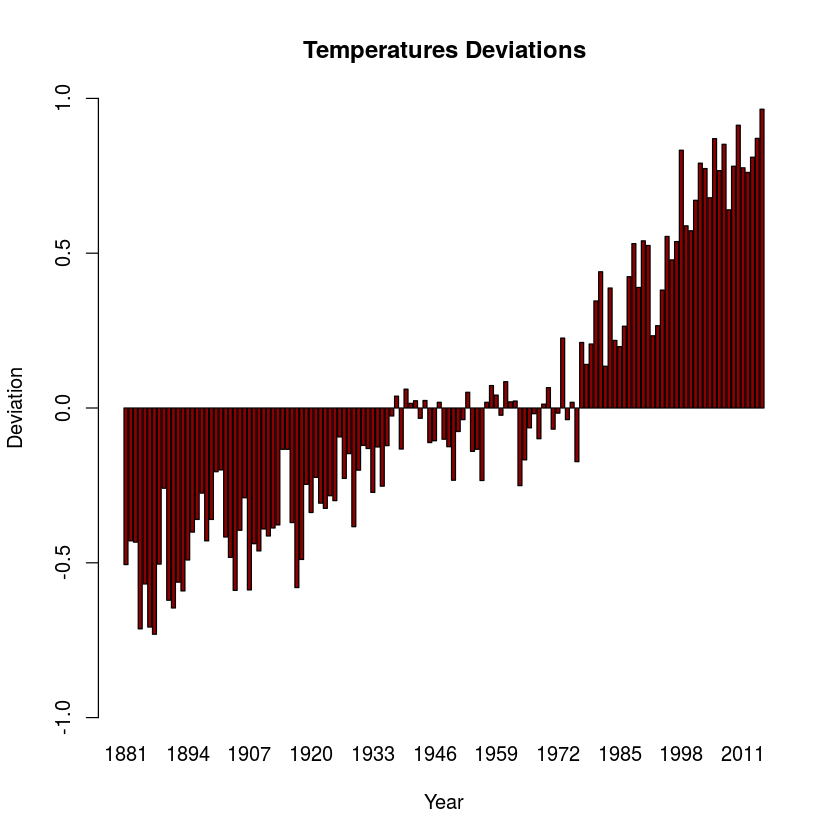

In [33]:
barplot(tabela.means$Means,
  main = "Temperatures Deviations",
  xlab = "Year",
  ylab = "Deviation",
  col = "darkred",
  names.arg=tabela.means$Year,
  ylim=c(-1,1))

In [36]:
# Source: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

library(lubridate)
library(dplyr)

# Data loading and NA removing
data_raw <- read.csv("/home/mapastec/Downloads/jupyter-notebooks/GlobalLandTemperaturesByCountry.csv")
data_raw <- na.omit(data_raw)

# Calculating average temperatire by country-year
data_raw$Year <- year(as.Date(data_raw$dt, "%Y-%m-%d"))

data <- data_raw %>%
        group_by(Country, Year) %>%
        summarise(avgTemp = mean(AverageTemperature))

# Writing tidy data
write.csv(data, "/home/mapastec/Downloads/jupyter-notebooks/GlobalLandTemperaturesByCountry.csv")


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [37]:
data <- read.csv("/home/mapastec/Downloads/jupyter-notebooks/GlobalLandTemperaturesByCountry.csv")
country <- "Poland"
startYear <- 1791
endYear <- 2013
temps <- data[data$Country == country &
              data$Year >= startYear & data$Year <= endYear, ]

In [38]:
gg <- ggplot(temps,
             aes(x = Year, y = avgTemp, colour = avgTemp)) +
        geom_point(size = 2) +
        scale_colour_gradient(high = "red", low = "blue",
                              name = "") +
        stat_smooth() +
        labs(title = paste0(country, ", ", startYear, " - ", endYear, "\n"),
             x = "Year",
             y = paste0("Annual Average Temperature, C\n")) +
        theme(plot.title = element_text(size = 22),
              text = element_text(size = 16))

`geom_smooth()` using method = 'loess'


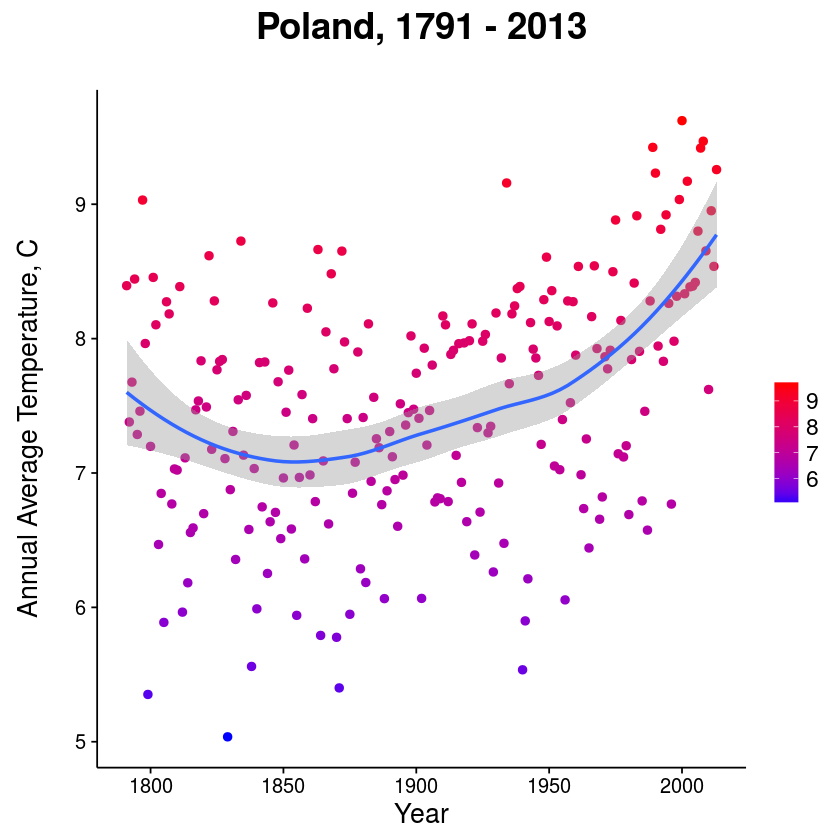

In [39]:
gg